<a href="https://colab.research.google.com/github/dpasierbiewicz/flower_classificator/blob/main/Flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset which i want to upload is from kaggle at the url https://www.kaggle.com/datasets/l3llff/flowers


In [ ]:
!pip install kaggle


If you want to download this dataset you have to go the Kaggle website, sign in and navigate to the settings page. Then you have to find "API" section and click on "Create New API Token". This action enable you to download a file "kaggle.json".


In [ ]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Moving kaggle,json to appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d l3llff/flowers

Dataset URL: https://www.kaggle.com/datasets/l3llff/flowers
License(s): CC0-1.0
 99% 225M/228M [00:08<00:00, 32.6MB/s]
100% 228M/228M [00:08<00:00, 29.3MB/s]


In [ ]:
!unzip flowers.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: flowers/magnolia/2090666304_0ff8463c5f_c.jpg  
  inflating: flowers/magnolia/20914736071_ede33a230a_c.jpg  
  inflating: flowers/magnolia/2126107417_92101f8b5f_c.jpg  
  inflating: flowers/magnolia/21500695820_bc9f753d79_c.jpg  
  inflating: flowers/magnolia/21986337916_36d1c95e64_c.jpg  
  inflating: flowers/magnolia/2294580412_50846f9130_c.jpg  
  inflating: flowers/magnolia/2300805045_982fa1bdf2_c.jpg  
  inflating: flowers/magnolia/2306786428_99f92b0d9c_c.jpg  
  inflating: flowers/magnolia/2324281515_c0269d5963_c.jpg  
  inflating: flowers/magnolia/2325102200_1cb9d8cabc_c.jpg  
  inflating: flowers/magnolia/2325102996_5f1e3bf13a_c.jpg  
  inflating: flowers/magnolia/2325370643_f452e88ace_c.jpg  
  inflating: flowers/magnolia/2334886646_c4c8ee532e_c.jpg  
  inflating: flowers/magnolia/23422365843_3b4b928a4a_c.jpg  
  inflating: flowers/magnolia/2365264040_1ff8f1fed3_c.jpg  
  inflating: flowers/magnolia/2

# 1. Transform a dataset folder
Dataset has 16 folder of flower species. What I want to do is add three folders "train", "validation", "test" where in each there will be 16 folders of different flower species and the proportion of a number of total photos will be 0.8 : 0.1 : 0.1

In [ ]:
import os
import shutil
import random

# Define the paths
source_folder = "flowers"
train_folder = os.path.join(source_folder, "train")
validation_folder = os.path.join(source_folder, "validation")
test_folder = os.path.join(source_folder, "test")

# List all the class folders
class_folders = [folder for folder in os.listdir(source_folder) if not folder.startswith('.')]

# Create train, validation, and test folders if they don't exist
for folder in [train_folder, validation_folder, test_folder]:
    os.makedirs(folder, exist_ok=True)

# Define the split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1




In [ ]:
class_folders

['coreopsis',
 'dandelion',
 'calendula',
 'daffodil',
 'common_daisy',
 'tulip',
 'carnation',
 'iris',
 'magnolia',
 'california_poppy',
 'sunflower',
 'water_lily',
 'astilbe',
 'rose',
 'bellflower',
 'black_eyed_susan']

In [ ]:
# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(source_folder, class_folder)
    files = os.listdir(class_path)
    random.shuffle(files)

    # Calculate the number of files for each split
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_validation = int(num_files * validation_ratio)
    num_test = num_files - num_train - num_validation

    # Split the files into train, validation, and test sets
    train_files = files[:num_train]
    validation_files = files[num_train:num_train + num_validation]
    test_files = files[num_train + num_validation:]

    # Move files to the corresponding folders
    for filename in train_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(train_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for filename in validation_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(validation_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

    for filename in test_files:
        src = os.path.join(class_path, filename)
        dest = os.path.join(test_folder, class_folder, filename)
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        shutil.copy(src, dest)

In [ ]:
for subfolder in class_folders:
  subfolder_path = os.path.join(source_folder, subfolder)
  if os.path.isdir(subfolder_path):
    shutil.rmtree(subfolder_path)

In [ ]:
#Define the paths to the train, validation, and test folders
train_folder = "flowers/train"
validation_folder = "flowers/validation"
test_folder = "flowers/test"

# Function to count the number of files in each folder
def count_files_in_folders(folder):
    folder_counts = {}
    subfolders = os.listdir(folder)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        num_files = len(os.listdir(subfolder_path))
        folder_counts[subfolder] = num_files
    return folder_counts

# Count the number of files in each folder for train, validation, and test
train_folder_counts = count_files_in_folders(train_folder)
validation_folder_counts = count_files_in_folders(validation_folder)
test_folder_counts = count_files_in_folders(test_folder)

# Print the results
print("Train folder:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nValidation folder:")
for folder, count in validation_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nTest folder:")
for folder, count in test_folder_counts.items():
    print(f"{folder}: {count} files")

Train folder:
coreopsis: 837 files
dandelion: 841 files
calendula: 782 files
daffodil: 776 files
common_daisy: 784 files
tulip: 838 files
carnation: 738 files
iris: 843 files
magnolia: 838 files
california_poppy: 817 files
sunflower: 821 files
water_lily: 785 files
astilbe: 589 files
rose: 799 files
bellflower: 698 files
black_eyed_susan: 800 files

Validation folder:
coreopsis: 104 files
dandelion: 105 files
calendula: 97 files
daffodil: 97 files
common_daisy: 98 files
tulip: 104 files
carnation: 92 files
iris: 105 files
magnolia: 104 files
california_poppy: 102 files
sunflower: 102 files
water_lily: 98 files
astilbe: 73 files
rose: 99 files
bellflower: 87 files
black_eyed_susan: 100 files

Test folder:
coreopsis: 106 files
dandelion: 106 files
calendula: 99 files
daffodil: 97 files
common_daisy: 98 files
tulip: 106 files
carnation: 93 files
iris: 106 files
magnolia: 106 files
california_poppy: 103 files
sunflower: 104 files
water_lily: 99 files
astilbe: 75 files
rose: 101 files
bellf

It looks like the folder is well adjusted and the proportion ratio is correct


In [23]:
#Creating Path objects which will help with choosing random path file
from pathlib import Path
image_path = Path("flowers")
train_dir = image_path / "train"
test_dir = image_path  / "test"
valid_dir = image_path / "validation"

train_dir, test_dir, valid_dir

(PosixPath('flowers/train'),
 PosixPath('flowers/test'),
 PosixPath('flowers/validation'))

Random image path: flowers/train/dandelion/41997407411_f0b442e799_c.jpg
Image class: dandelion
Image height: 256
Image width: 256


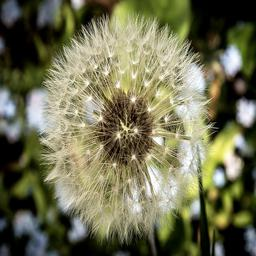

In [30]:
#Printing random image
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

# 2. TinyVGG architecture
At the start I will train a small TinyVGG model and see how good it is. Later I will use resnet18 model and I will compare these two models.

I will build TinyVGG model based on the excellent cnn explainer (https://poloclub.github.io/cnn-explainer/)
where image size is 64x64 and there are three color channels. I also recommend Daniel Bourke video about PyTorch where he uses this model (https://www.youtube.com/watch?v=Z_ikDlimN6A&t=2570s)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [33]:
#transforms size of a image to 64x64 pixels and transorms image into tensor
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

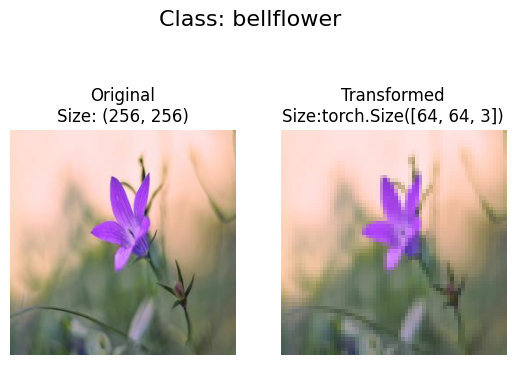

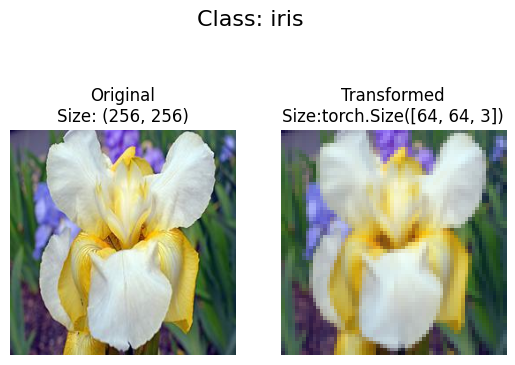

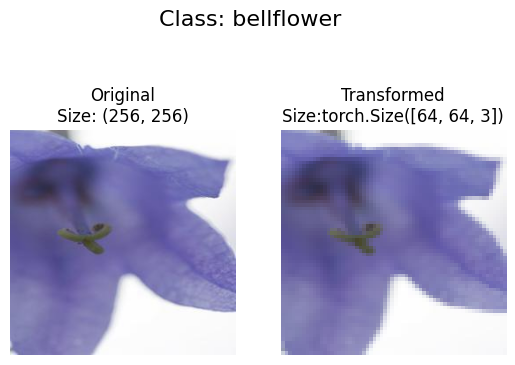

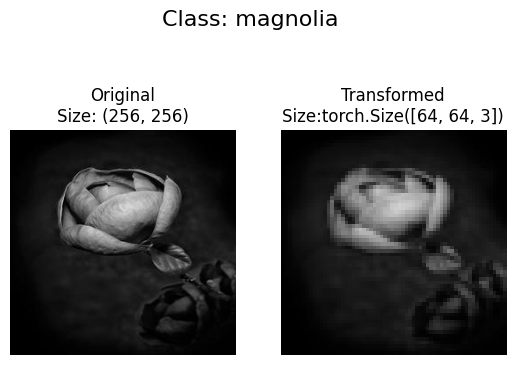

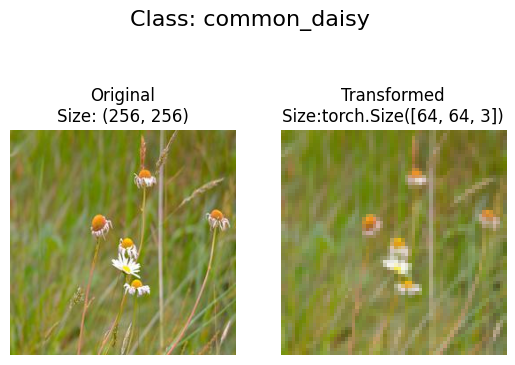

In [38]:
# function which takes n image paths and transform them
def plot_transformed_images(image_paths, transform, n=5, seed=None):
  if seed:
    random.seed(seed)
  # selecting n random image paths
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      # original photo
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)
      # changing dimensions of the tensor from [Color, Height, Width] to [H, W, C]
      # so a matplotlib.imshow can work properly
      transformed_image = transform(f).permute(1, 2, 0)
      #transformed photo
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_paths = image_path_list,
                        transform=data_transform,
                        n=5,
                        seed=None)